## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown

sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', None)  

import sys, os, yaml

DATASET = "Exercises Datasets"
COLAB = 'google.colab' in sys.modules

DEBUG = False
SEED = 666

In [2]:
COLAB = 'google.colab' in sys.modules

if COLAB:
  from google.colab import drive
  if not os.path.isdir("/content/gdrive"):
    drive.mount("/content/gdrive")
    d = "/content/gdrive/MyDrive/datasets"
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  ROOT = f"/content/gdrive/MyDrive/datasets/{DATASET.replace(' ','_')}/"
  if not os.path.isdir(ROOT): os.makedirs(ROOT)
else:
  ROOT = "./"

def makedirs(d):
  if COLAB:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  else:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d, mode=0o777, exist_ok=True)

for d in ['orig','data','output']: makedirs(d)

## Load

Escolha alguns datasets, à seu critério, para trabalhar.

In [3]:
df1 = pd.read_pickle(f"{ROOT}/data/basic1.pickle")
df2 = pd.read_pickle(f"{ROOT}/data/basic2.pickle")
df3 = pd.read_pickle(f"{ROOT}/data/basic3.pickle")

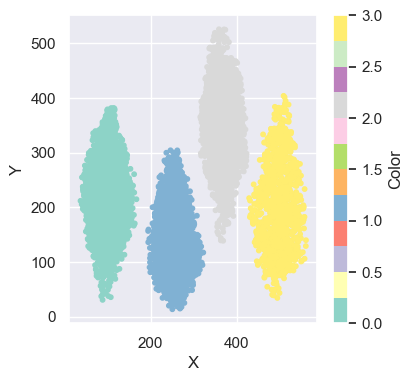

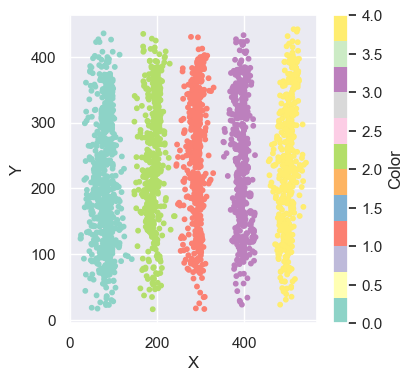

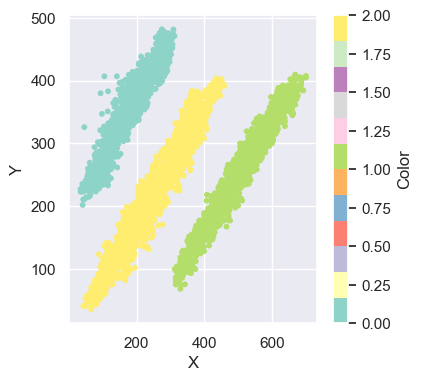

In [4]:
plt.figure(figsize=(4, 4))
plt.scatter(df1['x'], df1['y'], c=df1['color'], s=10, cmap="Set3")
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Color')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(df2['x'], df2['y'], c=df2['color'], s=10, cmap="Set3")
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Color')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(df3['x'], df3['y'], c=df3['color'], s=10, cmap="Set3")
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Color')
plt.grid(True)
plt.show()

## Pre-Processing

In [5]:
df1_kmeans = df1.copy()
df2_kmeans = df2.copy()
df3_kmeans = df3.copy()

In [6]:
df1_kmeans.drop(['color'], axis = 1, inplace =True)
df2_kmeans.drop(['color'], axis = 1, inplace =True)
df3_kmeans.drop(['color'], axis = 1, inplace =True)

## Elbow

Nesses datasets nós já temos os Clusters ideais, então fica facultativo usar o Elbow ou outro método para definição do K.

Você pode contar quantas cores/clusters o dataset possui. 

In [10]:
clusters = [4, 5, 3]

# Contagem de cores/clusters únicos em cada dataset
unique_clusters_df1 = len(df1['color'].unique())
unique_clusters_df2 = len(df2['color'].unique())
unique_clusters_df3 = len(df3['color'].unique())

print("Número de clusters únicos em df1:", unique_clusters_df1)
print("Número de clusters únicos em df2:", unique_clusters_df2)
print("Número de clusters únicos em df3:", unique_clusters_df3)



Número de clusters únicos em df1: 4
Número de clusters únicos em df2: 5
Número de clusters únicos em df3: 3


## Models

Vimos em aula o Kmeans

Tente também implementar os outros metodos e compare os resultados fazendo o plot do df_original (com as cores dos clusters ideais) e ao lado o plot com os clusters dos modelos

In [7]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture


Text(0.5, 0, 'X')

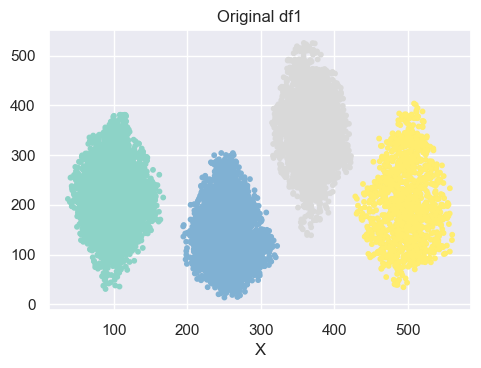

In [11]:
# Aplicando KMeans
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_df1 = kmeans_model.fit_predict(df1[['x', 'y']])
kmeans_df2 = kmeans_model.fit_predict(df2[['x', 'y']])
kmeans_df3 = kmeans_model.fit_predict(df3[['x', 'y']])

# Aplicando Agglomerative Clustering
agglo_model = AgglomerativeClustering(n_clusters=3)
agglo_df1 = agglo_model.fit_predict(df1[['x', 'y']])
agglo_df2 = agglo_model.fit_predict(df2[['x', 'y']])
agglo_df3 = agglo_model.fit_predict(df3[['x', 'y']])

# Aplicando DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_df1 = dbscan_model.fit_predict(df1[['x', 'y']])
dbscan_df2 = dbscan_model.fit_predict(df2[['x', 'y']])
dbscan_df3 = dbscan_model.fit_predict(df3[['x', 'y']])

# Aplicando Gaussian Mixture
gaussian_model = GaussianMixture(n_components=3, random_state=42)
gaussian_df1 = gaussian_model.fit_predict(df1[['x', 'y']])
gaussian_df2 = gaussian_model.fit_predict(df2[['x', 'y']])
gaussian_df3 = gaussian_model.fit_predict(df3[['x', 'y']])


# Plotando os resultados
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(df1['x'], df1['y'], c=df1['color'], s=10, cmap="Set3")
plt.title('Original df1')
plt.xlabel('X')


## Results

Comente sobre a performance das diferentes técnicas

### Qual é o propósito principal de usar técnicas de clustering em aprendizado de máquina?

O propósito principal de usar técnicas de clustering em aprendizado de máquina é agrupar dados com características similares sem supervisão prévia, facilitando a identificação de padrões e a tomada de decisões baseadas em dados.




### Quais são algumas das métricas comuns usadas para avaliar a qualidade de um cluster?


Algumas das métricas comuns usadas para avaliar a qualidade de um cluster incluem:
- Silhouette Score: Mede como cada ponto em um cluster está próximo dos pontos no seu cluster e longe dos pontos em outros clusters.
- Davies-Bouldin Index: Avalia a média da "similaridade" entre clusters, onde essa similaridade é uma medida que compara a distância entre clusters com o tamanho dos clusters em si.
- Calinski-Harabasz Index: Também conhecido como a razão da variância, que mede a dispersão entre clusters em relação à dispersão dentro de cada cluster.


### Como você decide o número ideal de clusters a serem usados em um determinado conjunto de dados?

 O número ideal de clusters é determinado utilizando métodos como o método do cotovelo, que analisa a variação explicada à medida que o número de clusters aumenta, e o método da silhueta, que considera a coesão e a separação dos clusters.




https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study#2.-Set-up